# Assignment 04

# 朱慧妍 12032885

## 1.Global Earthquakes

#### 加载程序所需模块并读取csv表格

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as ticker
%matplotlib inline
data=pd.read_csv('usgs_earthquakes.csv',index_col=0)
data

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
time,,,,,,,,,,,,,,
2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake


#### 对地震信息按地震级数mag进行由高到低排序，并展示top50的数据

In [3]:
data1=data.sort_values('mag',ascending=False)
data2=data1.head(50)
data2

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
time,,,,,,,,,,,,,,
2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.60900,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.13300,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.02900,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.82800,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.82000,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.88500,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.07800,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.25000,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.72900,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake


#### 将表格中经度、纬度和地震级数这三列转换为list

In [4]:
lats=data2['latitude'].values.tolist()#https://blog.csdn.net/cindy_1102/article/details/95450961
lons=data2['longitude'].values.tolist()
mag=data2['mag'].values.tolist()
print(type(lats))

<class 'list'>


#### 按照题目所给参考图，绘制地图

<ipython-input-5-26e231c66f41>:7: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  colorbar=plt.colorbar(ax2,cmap='Reds',label='magnitude',ticks=[6.6,6.8,7.0,7.2,7.4,7.6,7.8,8.0,8.2],fraction=0.012)


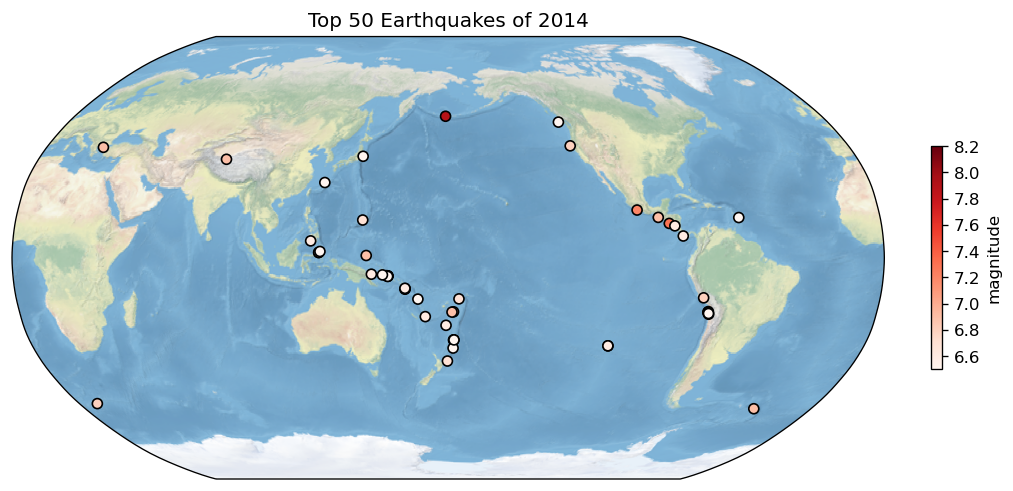

In [5]:
plt.figure(figsize=(10,5),dpi=120)
proj=ccrs.Robinson(central_longitude=179.99)
ax1=plt.axes(projection=proj)
ax1.stock_img()#参考课件后的附加材料
ax2=ax1.scatter(lons, lats, marker='o', c=mag,cmap='Reds',edgecolor='k',transform=ccrs.PlateCarree(),zorder=1)
colorbar=plt.colorbar(ax2,cmap='Reds',label='magnitude',ticks=[6.6,6.8,7.0,7.2,7.4,7.6,7.8,8.0,8.2],fraction=0.012)
colorbar.locator=ticker.MaxNLocator(nbins=10)
plt.title('Top 50 Earthquakes of 2014')
plt.show()

## 2.Explore a netCDF dataset

### 2.1

#### 加载所需要的模块并读取数据，所用数据是Assignment03第二题的数据

In [22]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as ticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline
ds = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

#### 对时间求平均，获得太阳辐射短波全球尺度的数据集

In [23]:
toa_sw_all_mon=ds.toa_sw_all_mon.mean(dim=['time'])
toa_sw_all_mon

<xarray.DataArray 'toa_sw_all_mon' (lat: 180, lon: 360)>
array([[122.27177, 122.27177, 122.27177, ..., 122.27177, 122.27177,
        122.27177],
       [119.92771, 119.92771, 119.92771, ..., 119.92771, 119.92771,
        119.92771],
       [119.24476, 119.24476, 119.24476, ..., 119.24476, 119.24476,
        119.24476],
       ...,
       [104.09706, 104.09706, 104.09706, ..., 104.09706, 104.09706,
        104.09706],
       [104.22638, 104.22638, 104.22638, ..., 104.22638, 104.22638,
        104.22638],
       [104.44447, 104.44447, 104.44447, ..., 104.44447, 104.44447,
        104.44447]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

#### 按照题目要求绘图

D:\anaconda\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
D:\anaconda\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


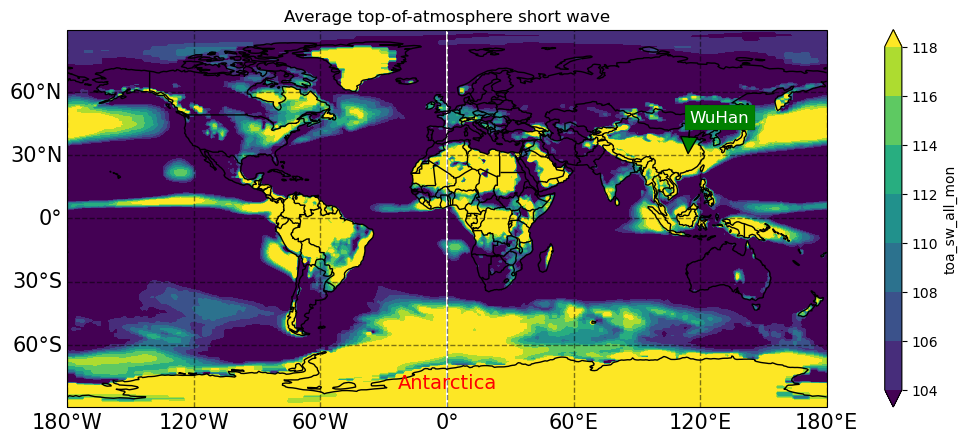

In [24]:
plt.figure(figsize=(15,5), dpi=100)
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.add_feature(cfeature.BORDERS,zorder=1)
ax.add_feature(cfeature.COASTLINE,zorder=1)
extent=[-180,180,-90,90]
##经纬度范围
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False ##关闭上侧坐标显示
gl.ylabels_right = False ##关闭右侧坐标显示
gl.xlabel_style={'size':15}
gl.ylabel_style={'size':15}
gl.xformatter = LONGITUDE_FORMATTER ##坐标刻度转换为经纬度样式
gl.yformatter = LATITUDE_FORMATTER 
levels=np.arange(104,120,2)
toa_sw_all_mon.plot.contourf(levels=levels,transform=ccrs.PlateCarree())
plt.title("Average top-of-atmosphere short wave")
central_lon, central_lat = 114.31, 30.52
plt.annotate('WuHan', xy=(central_lon, central_lat), xytext=(central_lon+15, central_lat+15),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='green', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')
plt.text(0.5, 0.05, "Antarctica", transform=plt.gca().transAxes, 
         fontsize=14, ha='center', color='red')
plt.show()

### 2.2

#### 与2.1类似做法，只是将2.1的图限制在了一个更小的区域

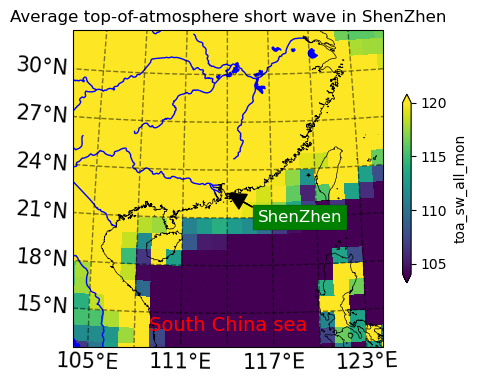

In [30]:
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Set Orthographic projection style
central_lon, central_lat = 114.06, 22.54 # Shenzhen is the map center location
proj = ccrs.Orthographic(central_lon, central_lat) 
ax = plt.axes(projection=proj)
# set the map size 
extent = [central_lon-10, central_lon+10, central_lat-10, central_lat+10]
ax.set_extent(extent)
#plot the surface runoff 
toa_sw_all_mon.plot(transform=ccrs.PlateCarree(),
         vmin=104, vmax=120, cbar_kwargs={'shrink': 0.5})
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False ##关闭上侧坐标显示
gl.ylabels_right = False ##关闭右侧坐标显示
gl.xlabel_style={'size':15}
gl.ylabel_style={'size':15}
gl.xformatter = LONGITUDE_FORMATTER ##坐标刻度转换为经纬度样式
gl.yformatter = LATITUDE_FORMATTER
# make an anotation, plot Shenzhen in the map
plt.annotate('ShenZhen', xy=(central_lon, central_lat), xytext=(central_lon+500000, central_lat-200000),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')
# add features, rivers and lakes
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=1)
ax.add_feature(cfeature.RIVERS, edgecolor='blue', zorder=1)
plt.title("Average top-of-atmosphere short wave in ShenZhen")
# Add features to axes using methods
ax.coastlines(resolution='10m', linewidth=0.5)
#plot the text, label the south China sea
plt.text(0.5, 0.05, "South China sea", transform=plt.gca().transAxes, fontsize=14, ha='center', color='red')
plt.show()